In [19]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
dre = pd.read_csv('../data/dfcs/dfp_cia_aberta_DRE_con_2028-2021.csv')
dre = dre[dre['ORDEM_EXERC']=='ÚLTIMO']
dre.shape

(70097, 15)

In [3]:
dre.head(3)

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
1,00.000.000/0001-91,2017-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.01,Receitas da Intermediação Financeira,139763614.0,S
3,00.000.000/0001-91,2017-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.01.01,Receita de Juros,139763614.0,S
5,00.000.000/0001-91,2017-12-31,2,BCO BRASIL S.A.,1023,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.02,Despesas da Intermediação Financeira,-109398266.0,S


In [4]:
empresas = dre[['DENOM_CIA', 'CD_CVM']].drop_duplicates().set_index('CD_CVM')
empresas

,DENOM_CIA
CD_CVM,
1023,BCO BRASIL S.A.
14206,BRB BCO DE BRASILIA S.A.
2437,CENTRAIS ELET BRAS S.A. - ELETROBRAS
14451,CIA ENERGETICA DE BRASILIA
15083,KOSMOS COMÉRCIO DE VESTUÁRIO S/A - EM RECUPERA...
...,...
80217,"INTER & CO, INC."
26867,UNIÃO QUÍMICA FARMACÊUTICA NACIONAL S.A.
26549,CLARANET TECHNOLOGY S.A.


In [5]:
empresa = dre[dre['CD_CVM']==7617]

In [6]:
empresa.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
20361,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.01,Receita de Venda de Bens e/ou Serviços,4969000.0,S
20363,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.02,Custo dos Bens e/ou Serviços Vendidos,-3674000.0,S
20365,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.03,Resultado Bruto,1295000.0,S
20367,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.04,Despesas/Receitas Operacionais,7295000.0,S
20369,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.04.01,Despesas com Vendas,-686000.0,S


In [7]:
contas = empresa[['CD_CONTA', 'DS_CONTA']].drop_duplicates().set_index('CD_CONTA')

In [8]:
contas

,DS_CONTA
CD_CONTA,
3.01,Receita de Venda de Bens e/ou Serviços
3.02,Custo dos Bens e/ou Serviços Vendidos
3.03,Resultado Bruto
3.04,Despesas/Receitas Operacionais
3.04.01,Despesas com Vendas
3.04.02,Despesas Gerais e Administrativas
3.04.03,Perdas pela Não Recuperabilidade de Ativos
3.04.04,Outras Receitas Operacionais
3.04.05,Outras Despesas Operacionais


In [9]:
lpa = empresa[empresa['CD_CONTA']=='3.99.01.02']
lpa.index = pd.to_datetime(lpa['DT_REFER'])
lpa.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2017-12-31,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.99.01.02,PN,1.13000,N
2018-12-31,61.532.644/0001-15,2018-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2018-01-01,2018-12-31,3.99.01.02,PN,1.13000,N
2019-12-31,61.532.644/0001-15,2019-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-01-01,2019-12-31,3.99.01.02,PN,1.23000,N
2020-12-31,61.532.644/0001-15,2020-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,3.99.01.02,PN,0.83892,N
2021-12-31,61.532.644/0001-15,2021-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2021-01-01,2021-12-31,3.99.01.02,PN,1.38201,N


In [10]:
lpa.head()

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2017-12-31,61.532.644/0001-15,2017-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.99.01.02,PN,1.13000,N
2018-12-31,61.532.644/0001-15,2018-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2018-01-01,2018-12-31,3.99.01.02,PN,1.13000,N
2019-12-31,61.532.644/0001-15,2019-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-01-01,2019-12-31,3.99.01.02,PN,1.23000,N
2020-12-31,61.532.644/0001-15,2020-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,3.99.01.02,PN,0.83892,N
2021-12-31,61.532.644/0001-15,2021-12-31,1,ITAÚSA S.A.,7617,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2021-01-01,2021-12-31,3.99.01.02,PN,1.38201,N


In [11]:
prices = yf.download('ITSA4.SA', start='2018-01-01', end='2021-12-31')[['Adj Close', 'Close']]
prices.head()

[*********************100%***********************]  1 of 1 completed


,Adj Close,Close
Date,,
2018-01-02,7.335383,9.549783
2018-01-03,7.421838,9.662337
2018-01-04,7.561495,9.844155
2018-01-05,7.574797,9.861471
2018-01-08,7.568145,9.852813


In [17]:
indicadores = prices.join(lpa['VL_CONTA'], how='outer')
indicadores.rename(columns={'VL_CONTA': 'LPA'}, inplace=True)
indicadores.fillna(method='ffill', inplace=True)
indicadores.dropna(inplace=True)
indicadores

,Adj Close,Close,LPA
2018-01-02,7.335383,9.549783,1.13000
2018-01-03,7.421838,9.662337,1.13000
2018-01-04,7.561495,9.844155,1.13000
2018-01-05,7.574797,9.861471,1.13000
2018-01-08,7.568145,9.852813,1.13000
...,...,...,...
2021-12-27,8.733527,9.090000,0.83892
2021-12-28,8.723919,9.080000,0.83892
2021-12-29,8.675880,9.030000,0.83892
2021-12-30,8.579801,8.930000,0.83892


In [18]:
indicadores['PL'] = indicadores['Close'] / indicadores['LPA']
indicadores['Adj PL'] = indicadores['Adj Close'] / indicadores['LPA']
indicadores

,Adj Close,Close,LPA,PL,Adj PL
2018-01-02,7.335383,9.549783,1.13000,8.451135,6.491490
2018-01-03,7.421838,9.662337,1.13000,8.550741,6.567998
2018-01-04,7.561495,9.844155,1.13000,8.711642,6.691588
2018-01-05,7.574797,9.861471,1.13000,8.726966,6.703360
2018-01-08,7.568145,9.852813,1.13000,8.719303,6.697473
...,...,...,...,...,...
2021-12-27,8.733527,9.090000,0.83892,10.835360,10.410441
2021-12-28,8.723919,9.080000,0.83892,10.823440,10.398988
2021-12-29,8.675880,9.030000,0.83892,10.763839,10.341726
2021-12-30,8.579801,8.930000,0.83892,10.644639,10.227198


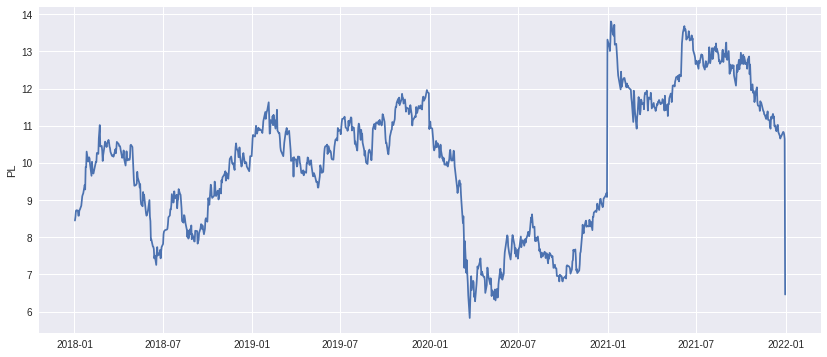

In [20]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.lineplot(data=indicadores, x=indicadores.index, y=indicadores['PL'])

plt.show()

In [21]:
indicadores.describe()

,Adj Close,Close,LPA,PL,Adj PL
count,993.000000,993.000000,993.000000,993.000000,993.000000
mean,9.365349,10.681396,1.082633,10.058273,8.860276
std,1.169260,1.339912,0.146663,1.812044,1.850383
min,6.476288,7.171428,0.838920,5.830429,5.265275
25%,8.551147,9.662337,1.130000,8.563685,7.260515
50%,9.385145,10.675324,1.130000,10.244033,8.664649
75%,10.201121,11.676190,1.230000,11.386520,10.391426
max,12.111217,13.666666,1.382010,13.804596,12.811449


In [24]:
pl_prepandemia = indicadores[:'2020-01-01']
pl_prepandemia.describe()

,Adj Close,Close,LPA,PL,Adj PL
count,496.000000,496.000000,496.000000,496.000000,496.000000
mean,9.486754,11.315514,1.130202,10.011783,8.393632
std,1.272075,1.209819,0.004490,1.068120,1.123114
min,6.622441,8.200000,1.130000,7.256637,5.860567
25%,8.513977,10.511904,1.130000,9.302570,7.534493
50%,9.534210,11.495238,1.130000,10.172777,8.437354
75%,10.454508,12.285714,1.130000,10.872313,9.251777
max,11.976179,13.514285,1.230000,11.959544,10.598389


In [25]:
pl_pandemia = indicadores['2020-01-01':]
pl_pandemia.describe()

,Adj Close,Close,LPA,PL,Adj PL
count,497.000000,497.000000,497.000000,497.000000,497.000000
mean,9.244188,10.048554,1.035159,10.104670,9.325980
std,1.044020,1.151786,0.196160,2.328971,2.270224
min,6.476288,7.171428,0.838920,5.830429,5.265275
25%,8.577005,9.295238,0.838920,7.688733,6.973175
50%,9.173466,9.923809,1.230000,10.716159,9.846518
75%,10.016397,10.714285,1.230000,12.237956,11.368839
max,12.111217,13.666666,1.382010,13.804596,12.811449


In [26]:
novo_mercado = pd.read_csv('../data/sample_market-2022-09-15.csv')
novo_mercado.shape

(120, 19)

In [27]:
novo_mercado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Nome Do Pregão            120 non-null    object 
 1   Código                    120 non-null    object 
 2   Denominação Social        120 non-null    object 
 3   Segmento De Mercado       120 non-null    object 
 4   Tipo De Capital           120 non-null    object 
 5   Capital R$                120 non-null    float64
 6   Aprovado Em               120 non-null    object 
 7   Qtde Ações Ordinárias     120 non-null    int64  
 8   Qtde Ações Preferenciais  120 non-null    int64  
 9   Qtde Total De Ações       120 non-null    int64  
 10  CNPJ                      120 non-null    object 
 11  Código CVM                120 non-null    int64  
 12  Ticker                    120 non-null    object 
 13  Atividade Principal       113 non-null    object 
 14  Setor Econ

In [34]:
tec = novo_mercado[novo_mercado['Setor Econômico']=='Tecnologia da Informação']
tec

,Nome Do Pregão,Código,Denominação Social,Segmento De Mercado,Tipo De Capital,Capital R$,Aprovado Em,Qtde Ações Ordinárias,Qtde Ações Preferenciais,Qtde Total De Ações,CNPJ,Código CVM,Ticker,Atividade Principal,Setor Econômico,Subsetor Econômico,Segmento Econômico,Site,Url
108,PADTEC,PDTC,PADTEC HOLDING S.A.,NOVO MERCADO,Homologado,1.992113e+08,05/06/2020,78449779,0,78449779,02.365.069/0001-44,18414,PDTC3.SA,Participação em outras sociedades. fdos de inv...,Tecnologia da Informação,Programas e Serviços,Programas e Serviços,www.padtec.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
109,POSITIVO TEC,POSI,POSITIVO TECNOLOGIA S.A.,NOVO MERCADO,Homologado,7.427000e+08,30/01/2020,141800000,0,141800000,81.243.735/0001-48,20362,POSI3.SA,Fabricação de hardware.,Tecnologia da Informação,Computadores e Equipamentos,Computadores e Equipamentos,www.positivoinformatica.com.br/ri,https://sistemaswebb3-listados.b3.com.br/liste...
110,SINQIA,SQIA,SINQIA S.A.,NOVO MERCADO,Homologado,8.133033e+08,03/09/2021,87941972,0,87941972,04.065.791/0001-99,22799,SQIA3.SA,Produção. desenvolvimento. licenciamento. subl...,Tecnologia da Informação,Programas e Serviços,Programas e Serviços,www.sinqia.com.br,https://sistemaswebb3-listados.b3.com.br/liste...
111,TOTVS,TOTS,TOTVS S.A.,NOVO MERCADO,Homologado,2.962585e+09,22/09/2021,617183181,0,617183181,53.113.791/0001-22,19992,TOTS3.SA,Prestação de serviços de consultoria. assessor...,Tecnologia da Informação,Programas e Serviços,Programas e Serviços,www.totvs.com.br,https://sistemaswebb3-listados.b3.com.br/liste...


In [37]:
tec['CNPJ'].to_list()

['02.365.069/0001-44',
 '81.243.735/0001-48',
 '04.065.791/0001-99',
 '53.113.791/0001-22']

In [39]:
df = dre[dre['CNPJ_CIA'].isin(tec['CNPJ'].to_list())]
df[['DENOM_CIA', 'CD_CVM']].drop_duplicates()

,DENOM_CIA,CD_CVM
1817,PADTEC HOLDING S.A.,18414
4133,SENIOR SOLUTION S.A.,22799
17475,TOTVS S.A.,19992
21809,POSITIVO TECNOLOGIA S.A.,20362
29029,SINQIA S.A.,22799


In [47]:
senior = dre[dre['DENOM_CIA']=='SENIOR SOLUTION S.A.']
sinqia = dre[dre['DENOM_CIA']=='SINQIA S.A.']

In [57]:
lpa_senior = senior[senior['CD_CONTA']=='3.99.02']
lpa_senior.index = pd.to_datetime(lpa_senior['DT_REFER'])
lpa_senior

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2017-12-31,04.065.791/0001-99,2017-12-31,1,SENIOR SOLUTION S.A.,22799,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2017-01-01,2017-12-31,3.99.02,Lucro Diluído por Ação,0.0,N


In [55]:
lpa_sinqia = sinqia[sinqia['CD_CONTA']=='3.99.02']
lpa_sinqia.index = pd.to_datetime(lpa_sinqia['DT_REFER'])
lpa_sinqia.shape

(4, 15)

In [56]:
lpa_sinqia

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_INI_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
DT_REFER,,,,,,,,,,,,,,,
2018-12-31,04.065.791/0001-99,2018-12-31,3,SINQIA S.A.,22799,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2018-01-01,2018-12-31,3.99.02,Lucro Diluído por Ação,0.0,N
2019-12-31,04.065.791/0001-99,2019-12-31,1,SINQIA S.A.,22799,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2019-01-01,2019-12-31,3.99.02,Lucro Diluído por Ação,0.0,N
2020-12-31,04.065.791/0001-99,2020-12-31,1,SINQIA S.A.,22799,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2020-01-01,2020-12-31,3.99.02,Lucro Diluído por Ação,0.0,N
2021-12-31,04.065.791/0001-99,2021-12-31,1,SINQIA S.A.,22799,DF Consolidado - Demonstração do Resultado,REAL,MIL,ÚLTIMO,2021-01-01,2021-12-31,3.99.02,Lucro Diluído por Ação,0.0,N


In [54]:
sinqia[sinqia['DT_REFER']=='2018-12-31'][['CD_CONTA', 'DS_CONTA', 'VL_CONTA']]

,CD_CONTA,DS_CONTA,VL_CONTA
29029,3.01,Receita de Venda de Bens e/ou Serviços,142109.0
29031,3.02,Custo dos Bens e/ou Serviços Vendidos,-89214.0
29033,3.03,Resultado Bruto,52895.0
29035,3.04,Despesas/Receitas Operacionais,-44816.0
29037,3.04.01,Despesas com Vendas,0.0
29039,3.04.02,Despesas Gerais e Administrativas,-41569.0
29041,3.04.03,Perdas pela Não Recuperabilidade de Ativos,0.0
29043,3.04.04,Outras Receitas Operacionais,0.0
29045,3.04.05,Outras Despesas Operacionais,-3247.0
29047,3.04.06,Resultado de Equivalência Patrimonial,0.0


In [64]:
setores = novo_mercado['Setor Econômico'].drop_duplicates().to_list()
for nome in setores:
    setor = novo_mercado[novo_mercado['Setor Econômico']==nome]
    df = dre[dre['CD_CVM'].isin(setor['Código CVM'].to_list())]
    print(f'\n{nome}')
    df = df[['DENOM_CIA', 'CD_CVM']].drop_duplicates().sort_values(['CD_CVM'])
    display(df)
    print(f'{df.shape[0]}\n')


Bens Industriais


,DENOM_CIA,CD_CVM
22381,WEG S.A.,5410
19849,ETERNIT S.A. - EM RECUPERAÇÃO JUDICIAL,5762
22445,TUPY S.A.,6343
42633,ROMI S.A.,7510
17703,INDUSTRIAS ROMI S.A.,7510
22225,PBG S/A,13773
1979,RUMO S.A.,17450
2553,SANTOS BRASIL PARTICIPACOES S.A.,17892
2685,CCR S.A.,18821
28937,ATMA PARTICIPAÇÕES S.A. - EM RECUPERAÇÃO JUDICIAL,19100


19


Comunicações


,DENOM_CIA,CD_CVM
79318,TIM S.A.,24929


1


Consumo Cíclico


,DENOM_CIA,CD_CVM
7375,GUARARAPES CONFECCOES S.A.,4669
14293,VIA S.A.,6505
24585,LOJAS RENNER S.A.,8133
18287,MAHLE-METAL LEVE S.A.,8575
17103,VULCABRAS S.A.,11762
19909,IOCHPE MAXION S.A.,11932
21279,CYRELA BRAZIL REALTY S.A.EMPREEND E PART,14460
1099,GAFISA S.A.,16101
19451,ROSSI RESIDENCIAL S.A.,16306
2621,COGNA EDUCAÇÃO S.A.,17973


42


Consumo não Cíclico


,DENOM_CIA,CD_CVM
16635,CIA BRASILEIRA DE DISTRIBUICAO,14826
1169,BRF S.A.,16292
22771,POMIFRUTAS S/A EM RECUPERACAO JUDICIAL,19658
6107,BRASILAGRO - CIA BRAS DE PROP AGRICOLAS,20036
5769,M.DIAS BRANCO S.A. IND COM DE ALIMENTOS,20338
17283,SAO MARTINHO S.A.,20516
2863,JBS S.A.,20575
23293,SLC AGRICOLA S.A.,20745
3759,MARFRIG GLOBAL FOODS S.A.,20788
21015,MINERVA S.A.,20931


12


Financeiro


,DENOM_CIA,CD_CVM
13709,SAO CARLOS EMPREEND E PARTICIPACOES S.A.,13781
1511,PORTO SEGURO S.A.,16659
5475,BR MALLS PARTICIPACOES S.A.,19909
5541,BR PROPERTIES S.A.,19925
6949,LPS BRASIL - CONSULTORIA DE IMOVEIS S.A.,20370
8273,SYN PROP & TECH S.A.,21040
7853,BRASIL BROKERS PARTICIPACOES S.A.,21180
32827,NEXPE PARTICIPAÇÕES S.A,21180
9389,"B3 S.A. - BRASIL, BOLSA, BALCÃO",21610
823,CIELO S.A.,21733


16


Materiais Básicos


,DENOM_CIA,CD_CVM
24717,IRANI PAPEL E EMBALAGEM S.A.,2429
15383,VALE S.A.,4170
18221,PARANAPANEMA S.A.,9393
11569,SUZANO S.A.,13986
2483,MMX MINERACAO E METALICOS S.A. - EM RECUPERAÇÃ...,17914
24837,DEXCO S.A.,21091


6


Petróleo. Gás e Biocombustíveis


,DENOM_CIA,CD_CVM
14851,ULTRAPAR PARTICIPACOES S.A.,18465
17027,COSAN S.A.,19836
23371,LUPATECH S.A. - EM RECUPERAÇÃO JUDICIAL,20060
9043,OSX BRASIL S.A.,21342
9713,PETRO RIO S.A.,22187
10311,ENAUTA PARTICIPAÇÕES S.A.,22365


6


Saúde


,DENOM_CIA,CD_CVM
20523,RAIA DROGASIL S.A.,5258
24189,DIMED S.A. DISTRIBUIDORA DE MEDICAMENTOS,9342
20299,DIAGNOSTICOS DA AMERICA S.A.,19623
17865,ODONTOPREV S.A.,20125
16409,PROFARMA DISTRIB PROD FARMACEUTICOS S.A.,20346
3001,HYPERA S.A.,21431
18937,FLEURY S.A.,21881
10465,QUALICORP CONSULTORIA E CORRETORA DE SEGUROS S.A.,22497
13003,OURO FINO SAUDE ANIMAL PARTICIPACOES S.A.,23507
16223,CENTRO DE IMAGEM DIAGNOSTICOS S.A.,24058


11


Tecnologia da Informação


,DENOM_CIA,CD_CVM
1817,PADTEC HOLDING S.A.,18414
17475,TOTVS S.A.,19992
21809,POSITIVO TECNOLOGIA S.A.,20362
4133,SENIOR SOLUTION S.A.,22799
29029,SINQIA S.A.,22799


5


Utilidade Pública


,DENOM_CIA,CD_CVM
2117,ENGIE BRASIL ENERGIA S.A.,17329
2051,CPFL ENERGIA S.A.,18660
12223,CIA SANEAMENTO DE MINAS GERAIS-COPASA MG,19445
3897,EDP - ENERGIAS DO BRASIL S.A.,19763
3495,LIGHT S.A.,19879
3427,EQUATORIAL ENERGIA S.A.,20010
4381,ENEVA S.A,21237


7

